In [1]:
%pylab inline
from sqlalchemy import create_engine
import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
%matplotlib inline

def get_lookupTable(file,code='code',label='label'):
    lookupTable={}
    df_lookupTable =  pd.read_csv(file)
    for i in range(0, len(df_lookupTable)):
        lookupTable[df_lookupTable.iloc[i][code]]=df_lookupTable.iloc[i][label]
    return lookupTable

Populating the interactive namespace from numpy and matplotlib


## Data Pereprocessing

In [2]:
df_Accidents  = pd.read_csv('data/Accidents0515.csv'  )
df_Severity = pd.read_csv('data/lookup/Accident_Severity.csv')
df_Vehicles0515 = pd.read_csv('data/Vehicles0515.csv',usecols=[0,1,2,4,6,11,14,15,16]) # اخر عمود بسبب مشكله لهذا تم تحديد الاعمدة المطلوبة
df_Casualties = pd.read_csv('data/Casualties0515.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])

In [3]:
df_Vehicles0515['Vehicle_Type'].replace(get_lookupTable('data/lookup/Vehicle_Type.csv'), inplace=True)
Severity_Type = df_Severity[['code','label']].set_index('code').to_dict()
df_Accidents['Severity_Type'] = df_Accidents['Accident_Severity'].map(Severity_Type['label'])
df_Accidents['Date2'] = pd.to_datetime(df_Accidents['Date'], format='%d/%m/%Y')
df_Accidents['Day_of_Week'].replace(get_lookupTable('data/lookup/Day_of_Week.csv'), inplace=True)
df_Accidents['Vehicle_Type'] = df_Accidents['Accident_Severity'].map(df_Vehicles0515['Vehicle_Type'])
df_Accidents['Weather_Conditions'].replace(get_lookupTable('data/lookup/Weather_conditions.csv'), inplace=True)
df_Accidents['Road_Surface_Conditions'].replace(get_lookupTable('data/lookup/Road_surface_conditions.csv'), inplace=True)
df_Accidents['Carriageway_Hazards'].replace(get_lookupTable('data/lookup/Carriageway_Hazards.csv'), inplace=True)
df_Accidents['Light_Conditions'].replace(get_lookupTable('data/lookup/Light_Conditions.csv'), inplace=True)
df_Accidents['Junction_Detail'].replace(get_lookupTable('data/lookup/Junction_Detail.csv'), inplace=True)
df_Accidents['Road_Type'].replace(get_lookupTable('data/lookup/Road_Type.csv'), inplace=True)

# df_Accidents

In [4]:
df_Accidents.columns

Index(['﻿Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Severity_Type', 'Date2', 'Vehicle_Type'],
      dtype='object')

# EDA

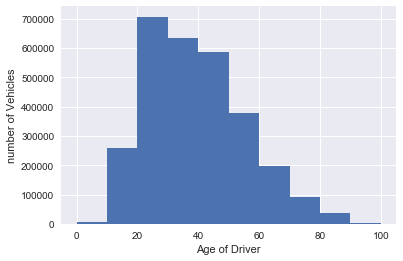

In [5]:
bin_edges= [0,10,20,30,40,50,60,70,80,90,100]
_=plt.hist(df_Vehicles0515['Age_of_Driver'], bins = bin_edges)
_=plt.xlabel('Age of Driver')
_=plt.ylabel('number of Vehicles')
plt.show()

In [6]:
#df_Driver_Sex_Male= df_Vehicles0515[(df_Vehicles0515.Sex_of_Driver == 1)&((df_Vehicles0515.Age_of_Driver>=20)&(df_Vehicles0515.Age_of_Driver<51))]
df_Driver_Sex_Male= df_Vehicles0515[df_Vehicles0515.Sex_of_Driver == 1]
df_Driver_Sex_Female= df_Vehicles0515[df_Vehicles0515.Sex_of_Driver == 2]
Male_Accident=len(df_Driver_Sex_Male)
Female_Accident=len(df_Driver_Sex_Female)
total_Accident=len(df_Vehicles0515)
per_Male_Accident=(Male_Accident/total_Accident)*100
per_Female_Accident=(Female_Accident/total_Accident)*100
print('Male_Accident=',format(round(per_Male_Accident,1)),'%')
print('Female_Accident=',format(round(per_Female_Accident,1)),'%')

Male_Accident= 65.8 %
Female_Accident= 28.3 %


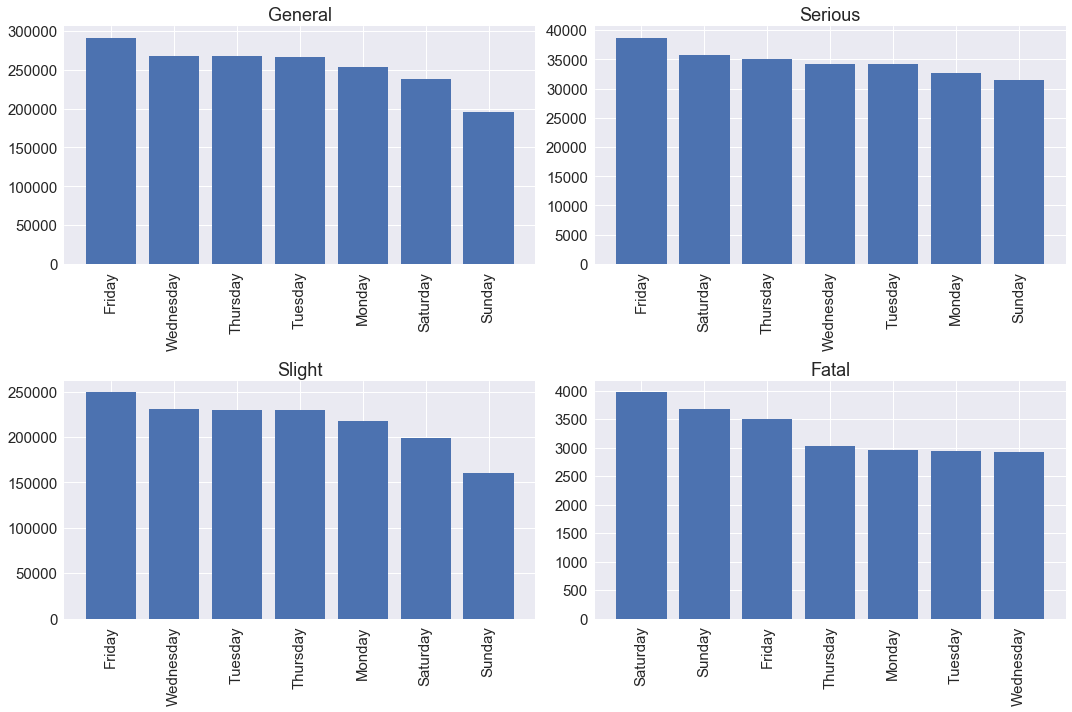

In [7]:
from collections import Counter
plt.figure(figsize=(15,10))
def histogram_label(df,i,Severity=-1):
    if Severity!=-1:
        df=df[df.Severity_Type==Severity]
    else:
        Severity='General'
    Day_of_Week = df.Day_of_Week
    Day_counts = Counter(Day_of_Week)

    common = Day_counts.most_common()
    labels = [item[0] for item in common]
    number = [item[1] for item in common]
    nbars = len(common)
    plt.subplot(2,2,i)
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(Severity, fontsize=18)
    plt.bar(np.arange(nbars), number, tick_label=labels)
   
histogram_label(df_Accidents,1)   
histogram_label(df_Accidents,2,'Serious')
histogram_label(df_Accidents,3,'Slight')
histogram_label(df_Accidents,4,'Fatal')

plt.tight_layout()
plt.show()

Counter({'Car': 1515575, 'Bus or coach (17 or more pass seats)': 265078})


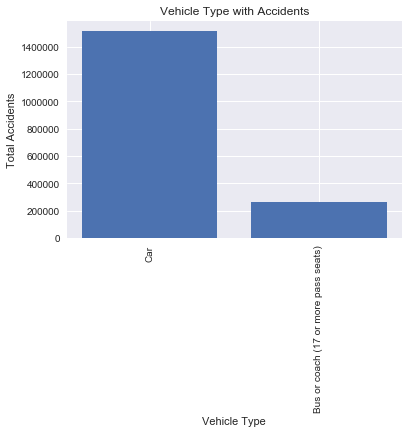

In [8]:
Vehicle_Type = df_Accidents.Vehicle_Type
Vehicle_counts = Counter(Vehicle_Type)
print(Vehicle_counts)
common = Vehicle_counts.most_common()
labels = [item[0] for item in common]
number = [item[1] for item in common]
nbars = len(common)
plt.xticks(rotation=90)
plt.title('Vehicle Type with Accidents')
_=plt.ylabel('Total Accidents')
_=plt.xlabel('Vehicle Type')
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.show()

In [9]:
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt
# import numpy as np
# df_Accidents=df_Accidents[df_Accidents.Vehicle_Type=='Car']

# def mapAccident_Severity(Severity,color) :
#     df_Accidents_Severity=df_Accidents[df_Accidents.Severity_Type==Severity]
#     plt.figure(figsize=(20,15)) 
#     map = Basemap(projection='tmerc', lat_0=54, lon_0=1,
#     resolution = 'h',  area_thresh = 0.1,
#     llcrnrlon=-9.111745, llcrnrlat=49.761209,
#     urcrnrlon=4.298973, urcrnrlat=58.797658)
 
#     map.drawcoastlines()
#     map.drawcountries()
#     map.fillcontinents(color='white')
#     map.drawmapboundary()
 
#     map.drawmeridians(np.arange(0, 360, 30))
#     map.drawparallels(np.arange(-90, 90, 30))
#     map.fillcontinents()
#     map.drawcoastlines()
#     map.drawcounties(zorder=0, color='white')

#     Longitudes= pd.np.array(df_Accidents_Severity.Longitude)
#     Latitudes= pd.np.array(df_Accidents_Severity.Latitude)
#     x,y = map(Longitudes, Latitudes)
#     map.plot(x, y, color, markersize=1)
#     plt.title('Distribution of traffic accidents - '+Severity)
#     plt.show()


# mapAccident_Severity('Slight','og') 
# mapAccident_Severity('Serious','bo')   
# mapAccident_Severity('Fatal','rd')

Counter({'Slight': 1515575, 'Serious': 242080, 'Fatal': 22998})
['Slight', 'Serious', 'Fatal']


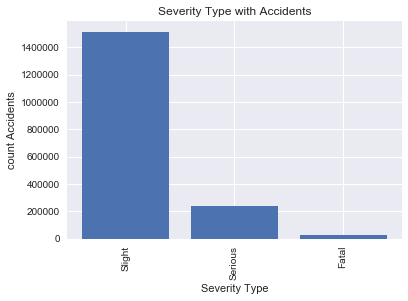

In [10]:
Severity_Type = df_Accidents.Severity_Type
Severity_counts = Counter(Severity_Type)
print(Severity_counts)
common = Severity_counts.most_common()
labels = [item[0] for item in common]
number = [item[1] for item in common]
print(labels)
nbars = len(common)
plt.xticks(rotation=90)
plt.title('Severity Type with Accidents')
_=plt.ylabel('count Accidents')
_=plt.xlabel('Severity Type')
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.show()

#### Accidents according to speed limit

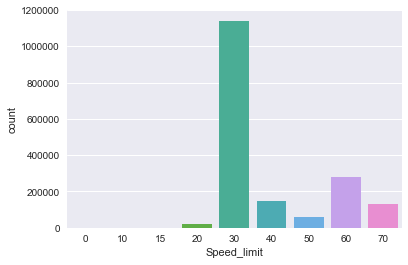

In [11]:
sns.countplot(data=df_Accidents, x="Speed_limit")

In [13]:
df_Accidents_Fatal= df_Accidents[df_Accidents.Severity_Type=='Fatal']
df_Accidents_Serious= df_Accidents[df_Accidents.Severity_Type=='Serious']
df_Accidents_Slight= df_Accidents[df_Accidents.Severity_Type=='Slight']

#### Accidents according to number of vehicles

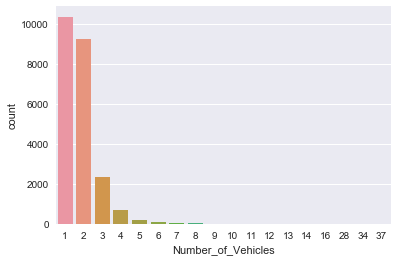

In [14]:
sns.countplot(data=df_Accidents_Fatal, x="Number_of_Vehicles")

#### Accidents according to number of vehicles

Counter({'Fine no high winds': 19021, 'Raining no high winds': 2215, 'Fine + high winds': 434, 'Raining + high winds': 357, 'Other': 345, 'Unknown': 303, 'Fog or mist': 209, 'Snowing no high winds': 96, 'Snowing + high winds': 15, 'Data missing or out of range': 3})
['Fine no high winds', 'Raining no high winds', 'Fine + high winds', 'Raining + high winds', 'Other', 'Unknown', 'Fog or mist', 'Snowing no high winds', 'Snowing + high winds', 'Data missing or out of range']


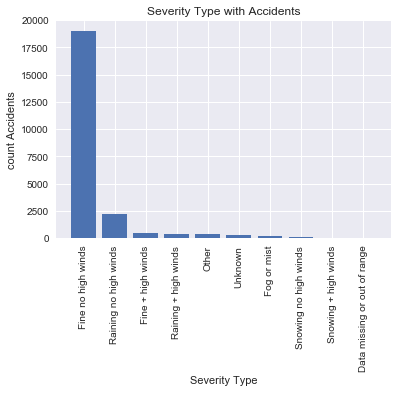

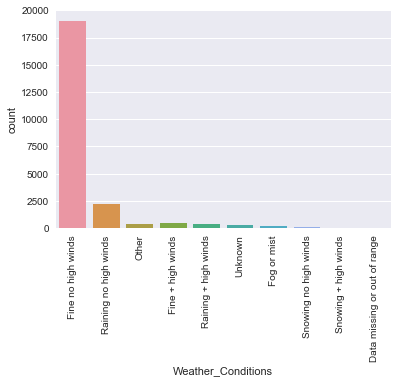

In [15]:
# sns.countplot(data=df_Accidents_Fatal, x="Weather_Conditions")
Weather_Conditions = df_Accidents_Fatal.Weather_Conditions
Weather_Conditions_counts = Counter(Weather_Conditions)
print(Weather_Conditions_counts)
common = Weather_Conditions_counts.most_common()
labels = [item[0] for item in common]
number = [item[1] for item in common]
print(labels)
nbars = len(common)
plt.xticks(rotation=90)
plt.title('Severity Type with Accidents')
_=plt.ylabel('count Accidents')
_=plt.xlabel('Severity Type')
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.show()
#####
_= sns.countplot(data=df_Accidents_Fatal, x="Weather_Conditions")
for label in _.get_xticklabels():
    label.set_rotation(90)

#### Accidents according to road surface conditions

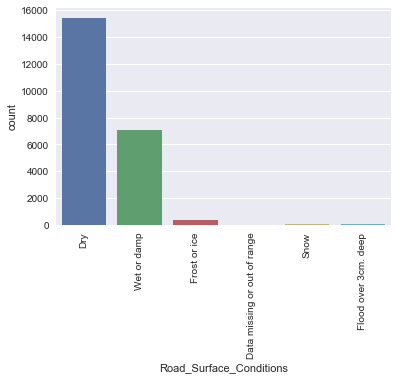

In [16]:
_= sns.countplot(data=df_Accidents_Fatal, x="Road_Surface_Conditions")
for label in _.get_xticklabels():
    label.set_rotation(90)

#### Accidents according to any carriageway hazards

Counter({'None': 22500, 'Other object on road': 236, 'Previous accident': 107, 'Any animal in carriageway (except ridden horse)': 77, 'Pedestrian in carriageway - not injured': 50, 'Vehicle load on road': 25, 'Data missing or out of range': 3})


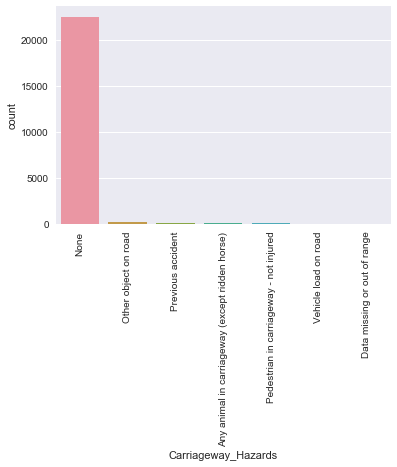

In [17]:
Carriageway_Hazards = df_Accidents_Fatal.Carriageway_Hazards
Carriageway_Hazards_counts = Counter(Carriageway_Hazards)
print(Carriageway_Hazards_counts)
_= sns.countplot(data=df_Accidents_Fatal, x="Carriageway_Hazards")
for label in _.get_xticklabels():
    label.set_rotation(90)

#### Light_Conditions

Counter({'Daylight': 13497, 'Darkness - lights lit': 4786, 'Darkness - no lighting': 4315, 'Darkness - lighting unknown': 243, 'Darkness - lights unlit': 157})


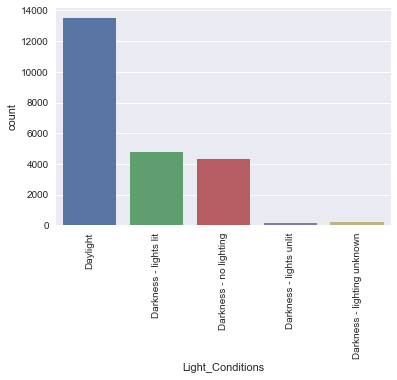

In [18]:
Light_Conditions = df_Accidents_Fatal.Light_Conditions
Light_Conditions_counts = Counter(Light_Conditions)
print(Light_Conditions_counts)
_= sns.countplot(data=df_Accidents_Fatal, x="Light_Conditions")
for label in _.get_xticklabels():
    label.set_rotation(90)

#### Accidents according to Junction_Detail

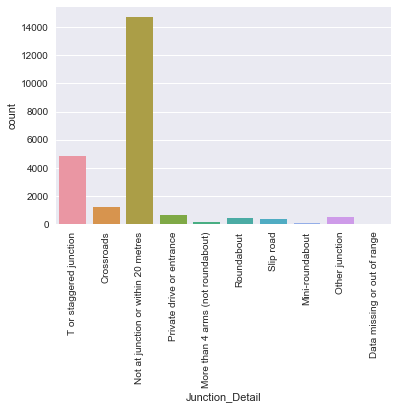

In [19]:
_= sns.countplot(data=df_Accidents_Fatal, x="Junction_Detail")
for label in _.get_xticklabels():
    label.set_rotation(90)

#### Accidents according to Road Type

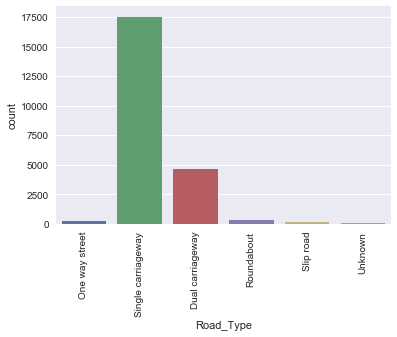

In [20]:
_= sns.countplot(data=df_Accidents_Fatal, x="Road_Type")
for label in _.get_xticklabels():
    label.set_rotation(90)

## Hypothesis Test:

In [21]:
Severity_Accidents_general_counts = Counter(df_Accidents.Vehicle_Type)
Severity_Accidents_Fatal_counts=Counter(df_Accidents_Fatal.Vehicle_Type)

per_car_Slight=(len(df_Accidents_Slight)/len(df_Accidents))*100
per_car_Serious=(len(df_Accidents_Serious)/len(df_Accidents))*100
per_car_fatal=(len(df_Accidents_Fatal)/len(df_Accidents))*100

print('The Total accidents cars=',len(df_Accidents))
print('The Total accidents cars Severity_Slight=',len(df_Accidents_Slight),'=',format(round(per_car_Slight,3)),'%')
print('The Total accidents cars Severity_Serious=',len(df_Accidents_Serious),'=',format(round(per_car_Serious,3)),'%')
print('The Total accidents cars Severity_Fatal=',len(df_Accidents_Fatal),'=',format(round(per_car_fatal,3)),'%')

The Total accidents cars= 1780653
The Total accidents cars Severity_Slight= 1515575 = 85.113 %
The Total accidents cars Severity_Serious= 242080 = 13.595 %
The Total accidents cars Severity_Fatal= 22998 = 1.292 %


Ho: percentage of fatal accidents > 1.14 <br>
Ha: percentage of fatal accidents <= 1.14

In [22]:
df_Accidents.loc[df_Accidents['Accident_Severity'] == 1, 'Accident_Severity'] ='1.14'
df_Accidents.loc[df_Accidents['Accident_Severity'] == 2, 'Accident_Severity'] ='11.639'
df_Accidents.loc[df_Accidents['Accident_Severity'] == 3, 'Accident_Severity'] ='87.221'
df_Accidents


,﻿Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Severity_Type,Date2,Vehicle_Type
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,11.639,1,1,04/01/2005,...,Raining no high winds,Wet or damp,0,None,1,1,E01002849,Serious,2005-01-04,Bus or coach (17 or more pass seats)
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,87.221,1,1,05/01/2005,...,Fine no high winds,Dry,0,None,1,1,E01002909,Slight,2005-01-05,Car
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,87.221,2,1,06/01/2005,...,Fine no high winds,Dry,0,None,1,1,E01002857,Slight,2005-01-06,Car
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,87.221,1,1,07/01/2005,...,Fine no high winds,Dry,0,None,1,1,E01002840,Slight,2005-01-07,Car
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,87.221,1,1,10/01/2005,...,Fine no high winds,Wet or damp,0,None,1,1,E01002863,Slight,2005-01-10,Car
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,1,87.221,2,1,11/01/2005,...,Raining no high winds,Wet or damp,6,None,1,1,E01002832,Slight,2005-01-11,Car
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,87.221,2,1,13/01/2005,...,Fine no high winds,Dry,0,None,1,1,E01002875,Slight,2005-01-13,Car
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,87.221,1,2,14/01/2005,...,Fine no high winds,Dry,0,None,1,1,E01002889,Slight,2005-01-14,Car
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,87.221,2,2,15/01/2005,...,Fine no high winds,Dry,0,None,1,1,E01002900,Slight,2005-01-15,Car
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,87.221,2,5,15/01/2005,...,Fine no high winds,Dry,0,None,1,1,E01002875,Slight,2005-01-15,Car


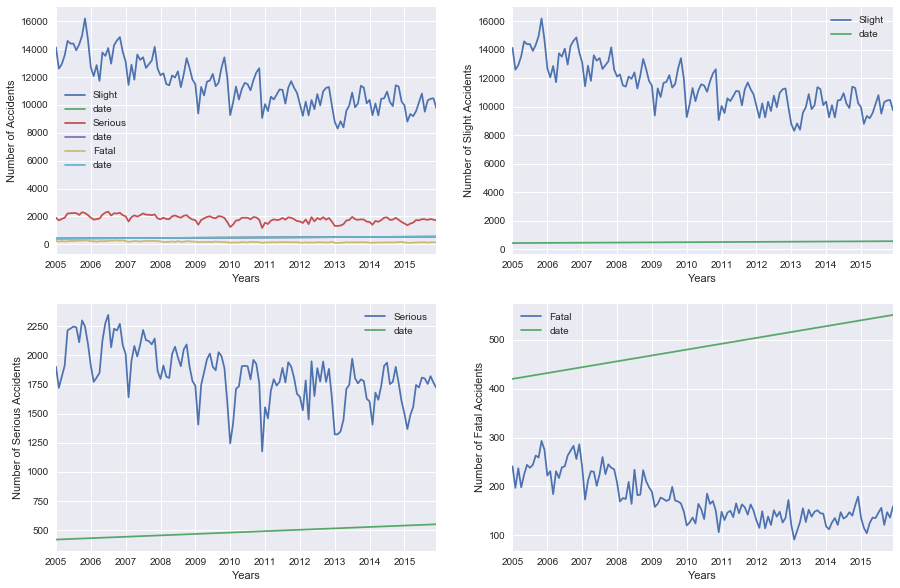

In [23]:
#Fatal Serious Slight
def AccidentsDates(Severity):
    df_Accidents_type_Severity= df_Accidents[df_Accidents.Severity_Type==Severity]
    pd.DatetimeIndex(df_Accidents_type_Severity.Date2).to_period("M")
    per = df_Accidents_type_Severity.Date2.dt.to_period("M")  # new way to get the same
    g = df_Accidents_type_Severity.groupby(per)
    g=g.count()
    g.rename(columns={'Date2': Severity}, inplace=True)
    df_Severity=pd.DataFrame(g[Severity])
    df_Severity['date'] = df_Severity.index.values
    return  df_Severity

df_Slight=AccidentsDates('Slight')
df_Serious=AccidentsDates('Serious')
df_Fatal=AccidentsDates('Fatal')

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
_=df_Slight.plot(ax=ax1)
_=df_Serious.plot(ax=ax1)
_=df_Fatal.plot(ax=ax1)

ax2 = fig.add_subplot(222)
df_Sl =df_Slight.plot(ax=ax2)

ax3 = fig.add_subplot(223)
df_Se =df_Serious.plot(ax=ax3)

ax4 = fig.add_subplot(224)
df_F =df_Fatal.plot(ax=ax4)

_.set_xlabel("Years")
_.set_ylabel("Number of Accidents")
df_Sl.set_xlabel("Years")
df_Sl.set_ylabel("Number of Slight Accidents")
df_Se.set_xlabel("Years")
df_Se.set_ylabel("Number of Serious Accidents")
df_F.set_xlabel("Years")
df_F.set_ylabel("Number of Fatal Accidents")

In [24]:
n=100000
sample_data_general = df_Accidents.sample(n)
sample_data_Fatal=sample_data_general[sample_data_general.Severity_Type=='Fatal']
sample_per_car_fatal=(len(sample_data_Fatal)/len(sample_data_general))*100
print('The Total accidents cars=',len(sample_data_general))
print('The Total accidents cars Severity_Fatal=',len(sample_data_Fatal))
print('The percentage of fatal accidents through cars=',format(round(sample_per_car_fatal,5)),'%')

#ss=(len(sample_data[sample_data.Accident_Severity=='Fatal'])/n)*100
#ss

The Total accidents cars= 100000
The Total accidents cars Severity_Fatal= 1232
The percentage of fatal accidents through cars= 1.232 %


In [25]:


print(format(round(sample_per_car_fatal-per_car_fatal,5)),'%')

-0.05955 %


Counter({'Slight': 85063, 'Serious': 13705, 'Fatal': 1232})
['Slight', 'Serious', 'Fatal']


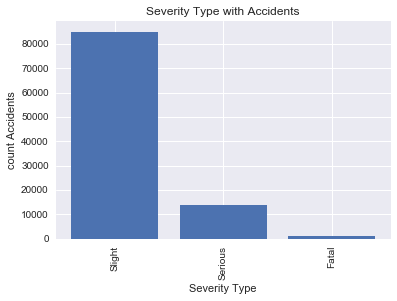

In [26]:
Severity_Type = sample_data_general.Severity_Type
Severity_counts = Counter(Severity_Type)
print(Severity_counts)
common_ = Severity_counts.most_common()
labels = [item[0] for item in common_]
number = [item[1] for item in common_]
print(labels)
nbars = len(common_)
plt.xticks(rotation=90)
plt.title('Severity Type with Accidents')
_=plt.ylabel('count Accidents')
_=plt.xlabel('Severity Type')
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.show()


# Population

In [27]:
mean=df_Accidents['Accident_Severity'].astype(float).mean()
print("Mean: ",mean,'\n')


std=df_Accidents['Accident_Severity'].astype(float).std()
print("Standard deviation: ",std,'\n')

Mean:  75.83383956096722 

Standard deviation:  27.251970787489515 



# Sample

In [28]:
print("Mean sample: \n")

mean_sample=sample_data_general['Accident_Severity'].astype(float).mean()
print(mean)
print("\nStandard deviation: \n")
std_sample=sample_data_general['Accident_Severity'].astype(float).std()
print(std)


Mean sample: 

75.83383956096722

Standard deviation: 

27.251970787489515


## Z-Test

In [29]:
z=(mean_sample-mean)/(std/np.sqrt(n))
z

-0.36982142371660892

In [30]:
from scipy import stats
p_value=stats.norm.cdf(z,0,1)*2
p_value

0.71151555138254052

p-value > 0.05 We reject Ho and accept our hypothesis

In [31]:
df_Accidents.Weather_Conditions[:500]

0      Raining no high winds
1         Fine no high winds
2         Fine no high winds
3         Fine no high winds
4         Fine no high winds
5      Raining no high winds
6         Fine no high winds
7         Fine no high winds
8         Fine no high winds
9         Fine no high winds
10        Fine no high winds
11        Fine no high winds
12     Raining no high winds
13     Raining no high winds
14        Fine no high winds
15        Fine no high winds
16        Fine no high winds
17        Fine no high winds
18        Fine no high winds
19        Fine no high winds
20        Fine no high winds
21        Fine no high winds
22        Fine no high winds
23        Fine no high winds
24        Fine no high winds
25     Raining no high winds
26        Fine no high winds
27     Raining no high winds
28     Raining no high winds
29        Fine no high winds
               ...          
470       Fine no high winds
471       Fine no high winds
472       Fine no high winds
473       Fine

In [32]:
df_Accidents_ML  = pd.read_csv('data/Accidents0515.csv'  )